Importing libraries


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [61]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [21]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


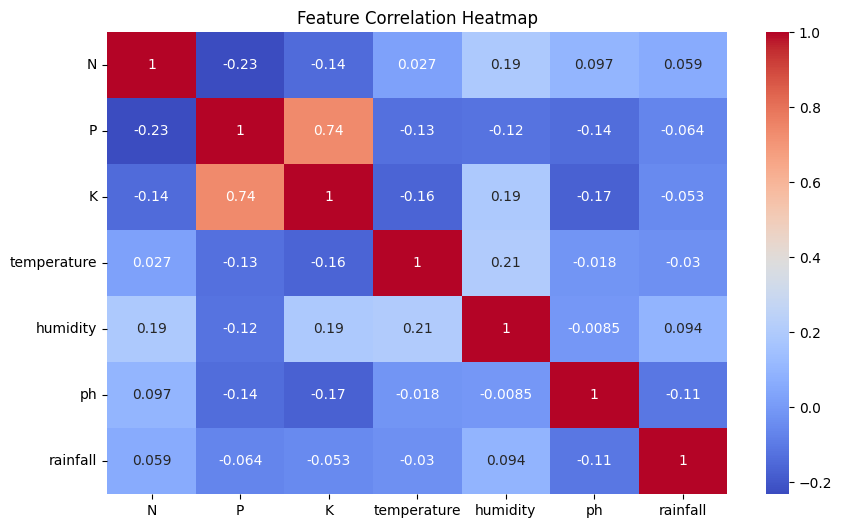

In [62]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Exclude non-numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [25]:
print(df.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
X = df[['humidity', 'rainfall', 'ph', 'N', 'P', 'K','temperature']]
y = df['label_encoded']  # Use encoded labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [50]:
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [51]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [52]:
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y.unique()), activation='softmax')  # Adjust based on unique labels
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, verbose=1)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2665 - loss: 2.7921
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7259 - loss: 1.4693
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.6781
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9074 - loss: 0.4292
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.2839
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9462 - loss: 0.2278
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1798
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.1475
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.1227
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.1142
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9771 - loss: 0.0974
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [55]:
from sklearn.metrics import accuracy_score

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



Random Forest Accuracy: 0.9954545454545455

SVM Accuracy: 0.9681818181818181

XGBoost Accuracy: 0.9863636363636363


In [ ]:
from sklearn.metrics import classification_report

print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))
print("\nXGBoost Report:\n", classification_report(y_test, y_pred_xgb))  



Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

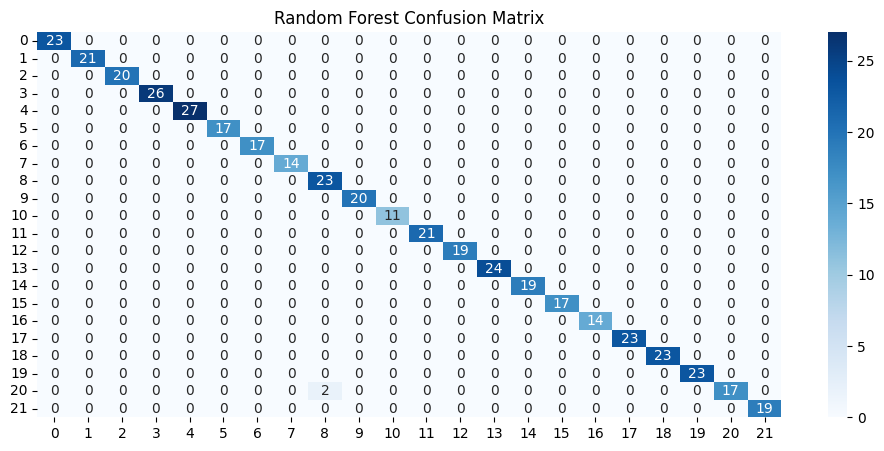

In [58]:
plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [73]:
crop_rotation_map = {
    'rice': ['lentil', 'chickpea', 'mustard'],
    'maize': ['soybean', 'blackgram', 'pea'],
    'wheat': ['mustard', 'pea', 'sunflower'],
    'cotton': ['groundnut', 'pigeon peas', 'jowar'],
    'sugarcane': ['barley', 'lentil', 'green gram'],
    'carrot': ['onion', 'beetroot', 'radish'],
    'beetroot': ['cabbage', 'cauliflower', 'garlic'],
    'watermelon': ['pumpkin', 'tomato', 'cucumber'],
    'tomato': ['beans', 'cabbage', 'coriander'],
    'onion': ['tomato', 'carrot', 'potato'],
    'garlic': ['peas', 'mustard', 'lentil'],
    'cabbage': ['tomato', 'carrot', 'radish'],
    'cauliflower': ['onion', 'spinach', 'lettuce'],
    'pumpkin': ['beans', 'okra', 'peas'],
    'chickpea': ['maize', 'millet', 'sorghum'],
    'blackgram': ['rice', 'maize', 'sesame'],
    'lentil': ['rice', 'mustard', 'cotton'],
    'pigeon peas': ['groundnut', 'pearl millet'],
    'soybean': ['maize', 'barley', 'jowar'],
    'mustard': ['wheat', 'barley', 'green gram'],
    'groundnut': ['pigeon peas', 'castor', 'sunflower'],
    'peas': ['carrot', 'potato', 'cabbage'],
    'potato': ['wheat', 'maize', 'mustard'],
    'sunflower': ['mustard', 'wheat', 'barley'],
    'mango': ['legumes', 'turmeric', 'ginger'],
    'banana': ['legumes', 'coconut', 'pineapple'],
    'apple': ['walnut', 'pear', 'cherry'],
    'grapes': ['citrus', 'olive', 'pomegranate'],
    'papaya': ['banana', 'mango', 'coconut'],
    'coconut': ['pineapple', 'banana', 'mango'],
    'coffee': ['tea', 'cardamom', 'black pepper'],
    'tea': ['coffee', 'black pepper', 'ginger'],
    'cashew': ['mango', 'coconut', 'banana'],
    'pomegranate': ['grapes', 'guava', 'citrus'],
    'guava': ['pomegranate', 'papaya', 'lemon'],
    'orange': ['lemon', 'grapefruit', 'pomegranate'],
    'lemon': ['orange', 'papaya', 'coconut'],
    'jackfruit': ['banana', 'coconut', 'areca nut'],
    'areca nut': ['black pepper', 'coffee', 'cardamom'],
    'black pepper': ['coffee', 'coconut', 'areca nut'],
    'muskmelon': ['pumpkin', 'cucumber', 'okra'],
    'mothbeans': ['millet', 'sorghum', 'green gram'],
    'mungbean': ['maize', 'pigeon peas', 'sesame']    
}
recommended_rotation = [crop_rotation_map.get(crop, ["No rotation data"])[0] for crop in y_pred_labels]

print("\nPredictions and Recommended Rotations:\n")
for i in range(10):  # Display first 10 predictions
    print(f"Predicted Crop: {y_pred_labels[i]} → Recommended Rotation: {recommended_rotation[i]}")



Predictions and Recommended Rotations:

Predicted Crop: muskmelon → Recommended Rotation: pumpkin
Predicted Crop: watermelon → Recommended Rotation: pumpkin
Predicted Crop: papaya → Recommended Rotation: banana
Predicted Crop: papaya → Recommended Rotation: banana
Predicted Crop: apple → Recommended Rotation: walnut
Predicted Crop: mango → Recommended Rotation: legumes
Predicted Crop: apple → Recommended Rotation: walnut
Predicted Crop: mothbeans → Recommended Rotation: millet
Predicted Crop: mungbean → Recommended Rotation: maize
Predicted Crop: lentil → Recommended Rotation: rice
